## 基礎建設

In [97]:
import pandas as pd
import gzip, json
import matplotlib.pyplot as plt
import numpy as np

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

## 載入資料

In [2]:
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/All_Beauty.csv
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_All_Beauty.json.gz

In [3]:
metadata = getDF('data/meta_All_Beauty.json.gz')
ratings = pd.read_csv('data/All_Beauty.csv', names=['asin', 'reviewerID', 'overall', 'unixReviewTime'], header=None)

In [4]:
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [5]:
ratings.head()

,asin,reviewerID,overall,unixReviewTime
0,0143026860,A1V6B6TNIC10QE,1.0,1424304000
1,0143026860,A2F5GHSXFQ0W6J,4.0,1418860800
2,0143026860,A1572GUYS7DGSR,4.0,1407628800
3,0143026860,A1PSGLFK1NSVO,5.0,1362960000
4,0143026860,A6IKXKZMTKGSC,5.0,1324771200


## 資料整理

In [9]:
ratings['DATE'] = pd.to_datetime(ratings['unixReviewTime'], unit='s')

## 資料切分

In [21]:
ratings_trainings = ratings[
    (ratings['DATE'] < '2018-09-01')
]
ratings_testings = ratings[
    (ratings['DATE'] >= '2018-09-01') & 
    (ratings['DATE'] <= '2018-09-30')
]
ratings_testings_by_user = ratings_testings.groupby('reviewerID').agg(list).reset_index()[['reviewerID', 'asin']].to_dict('records')
ratings_testings_by_user = { rating['reviewerID']: rating['asin'] for rating in ratings_testings_by_user }
users = list(ratings_testings_by_user.keys())

{'A100XQFWKQ30O2': ['B01DKQAXC0'],
 'A103T1QOGFCSEH': ['B01DKQAXC0'],
 'A106UKKSJ2KXPF': ['B01ENS6XDC'],
 'A10A7GV4D5A11V': ['B01BFSNF66'],
 'A1119JJ37ZLB8R': ['B01CJNZKZK'],
 'A113UOOLBSZN52': ['B01EKY0M22'],
 'A12M4U7WK4ALCR': ['B01DKQAXC0'],
 'A12T8YTW6VWT7S': ['B01G53GFKO'],
 'A1364JXGKB46MM': ['B01GLA54SA'],
 'A137DALOQFKBTI': ['B01AWXGD3M'],
 'A13FEZ3WV7S2EY': ['B01BHN3EHE'],
 'A13IV4I1B0RXMG': ['B01DKQAXC0'],
 'A13JU88JAHN72I': ['B017I6B6GK'],
 'A13K55R6VH1OOD': ['B01FNJ9MOW'],
 'A13P7VFU075A': ['B01H3ZQ2NI'],
 'A13SWYE4QLB6NG': ['B01DVLHVPQ'],
 'A13ZTQ0Q4ATA41': ['B01AE1TJV0'],
 'A142EDN04OD62U': ['B01CW24JXC'],
 'A142I22FIC8MZK': ['B01CD7JK9E'],
 'A14834QTII5TLT': ['B01GK8P0CS'],
 'A14A447VPACTBC': ['B01B3R5EFO'],
 'A14AP6MN5XO6LB': ['B01E7UKR38'],
 'A14CLF25IX25US': ['B01DLR9IDI'],
 'A14LYXC3HTBAHI': ['B01FT6TMQM'],
 'A14VUW4KZ34EOE': ['B01DKQAXC0'],
 'A14Y32P26G9YL': ['B018WCT01C'],
 'A157T25PBS7MX4': ['B01CX5KCIE'],
 'A15HZDSERD85C8': ['B01DDWA5II'],
 'A15JJ8J1FGADIX': ['B0

## EDA

使用者重復購買次數

In [22]:
ratings_trainings

,asin,reviewerID,overall,unixReviewTime,DATE
0,0143026860,A1V6B6TNIC10QE,1.0,1424304000,2015-02-19
1,0143026860,A2F5GHSXFQ0W6J,4.0,1418860800,2014-12-18
2,0143026860,A1572GUYS7DGSR,4.0,1407628800,2014-08-10
3,0143026860,A1PSGLFK1NSVO,5.0,1362960000,2013-03-11
4,0143026860,A6IKXKZMTKGSC,5.0,1324771200,2011-12-25
...,...,...,...,...,...
371340,B01HJEGTYK,A202DCI7TV1022,1.0,1500508800,2017-07-20
371341,B01HJEGTYK,A3FSOR5IJOFIBE,5.0,1489622400,2017-03-16
371342,B01HJEGTYK,A1B5DK6CTP2P24,5.0,1488326400,2017-03-01
371343,B01HJEGTYK,A23OUYS5IRMJS9,2.0,1487635200,2017-02-21


In [24]:
df = ratings_trainings.groupby(['reviewerID', 'asin']).agg(DATE_list=('DATE', list), overall_list=('overall', list), count=('overall', 'size'))

In [34]:
df = df.sort_values('count', ascending=False)

dict_items([(1, 351534), (2, 9325), (3, 85), (4, 56), (5, 3), (6, 3), (11, 2), (7, 1), (8, 1), (9, 1), (10, 1)])

In [53]:
print('購買次數 發生次數 (group by (user, asin))')
for i, k in df.value_counts('count').items():
    print(('%7s %7s') % (i, k))

購買次數 發生次數 (group by (user, asin))
      1  351534
      2    9325
      3      85
      4      56
      5       3
      6       3
     11       2
      7       1
      8       1
      9       1
     10       1


Text(0.5, 1.0, '(user, asin)')

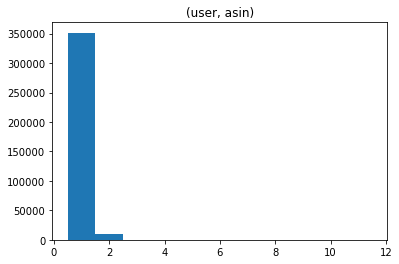

In [39]:
plt.bar(df.value_counts('count').index, df.value_counts('count').tolist(), width=1.0)
plt.title('(user, asin)')
# 重覆購買次數很少，但還是有人會重復買

## 產生推薦

In [69]:
import pandas as pd
from itertools import combinations
from collections import defaultdict

def recommender(training_data, users=[], k=10):

    # loading data from dataframe
    # item_to_users dict:
    # {
    #   'item': {
    #       'user': ratings...
    #   }...
    # }
    item_to_users = defaultdict(dict)
    for _, row in training_data.iterrows():
        row = dict(row)
        user = row['reviewerID']
        item = row['asin']
        rating = float(row['overall'])
        item_to_users[item][user] = rating

    print("data converted")

    user_to_items = defaultdict(dict)
    for item, rating_users in item_to_users.items():
        for user, rating in rating_users.items():
            user_to_items[user][item] = rating

    print("data inverted")

    init_sim = lambda: [0, 0, 0]
    factory = lambda: defaultdict(init_sim)
    pre_item_similarity = defaultdict(factory)
    for user, items in user_to_items.items():
        if len(items) > 1:
            for i1, i2 in combinations(items.keys(), 2):
                xy = items[i1] * items[i2]
                xx = items[i1] ** 2
                yy = items[i2] ** 2
                pre_item_similarity[i1][i2][0] += xy
                pre_item_similarity[i1][i2][1] += xx
                pre_item_similarity[i1][i2][2] += yy

                pre_item_similarity[i2][i1][0] += xy
                pre_item_similarity[i2][i1][1] += xx
                pre_item_similarity[i2][i1][2] += yy

    print("sim data prepared")

    item_similarity = {}
    for src_item in pre_item_similarity:
        item_similarity_order = []
        for dst_item, val in pre_item_similarity[src_item].items():
            xy = val[0]
            xx = val[1]
            yy = val[2]
            div = ((xx*yy) ** 0.5)
            if div == 0:
                continue
            similarity = xy / div
            if similarity < 0:
                continue
            for i, s in enumerate(item_similarity_order):
                target_similarity = s[1]
                if target_similarity < similarity:
                    item_similarity_order.insert(i, (dst_item, similarity))
                    break
            else:
                item_similarity_order.append((dst_item, similarity))
        item_similarity[src_item] = item_similarity_order

    print(f"get {k} recommendation items for for user: {users}")

    recommendation = {}
    for user in users:
        items = []
        items_set = set()
        stop = False
        user_has_rated = set(user_to_items[user])
        for item in user_has_rated:
            if item in item_similarity:
                for sim_item, _ in item_similarity[item]:

                    # 可以考慮重復購買
                    # skip the item user has rated
                    # if sim_item not in user_has_rated and sim_item not in items_set:

                    if sim_item not in items_set:
                        items.append(sim_item)
                        items_set.add(sim_item)
                    if len(items) >= k:
                        stop = True
                        break
                if stop:
                    break
        recommendation[user] = items
    return recommendation, item_similarity

ratings_by_user, similarity = recommender(ratings_trainings, users)
ratings_by_user

data converted
data inverted
sim data prepared
get 10 recommendation items for for user: ['A100XQFWKQ30O2', 'A103T1QOGFCSEH', 'A106UKKSJ2KXPF', 'A10A7GV4D5A11V', 'A1119JJ37ZLB8R', 'A113UOOLBSZN52', 'A12M4U7WK4ALCR', 'A12T8YTW6VWT7S', 'A1364JXGKB46MM', 'A137DALOQFKBTI', 'A13FEZ3WV7S2EY', 'A13IV4I1B0RXMG', 'A13JU88JAHN72I', 'A13K55R6VH1OOD', 'A13P7VFU075A', 'A13SWYE4QLB6NG', 'A13ZTQ0Q4ATA41', 'A142EDN04OD62U', 'A142I22FIC8MZK', 'A14834QTII5TLT', 'A14A447VPACTBC', 'A14AP6MN5XO6LB', 'A14CLF25IX25US', 'A14LYXC3HTBAHI', 'A14VUW4KZ34EOE', 'A14Y32P26G9YL', 'A157T25PBS7MX4', 'A15HZDSERD85C8', 'A15JJ8J1FGADIX', 'A15ZCL70JXXH89', 'A1617KN2IAWZ6J', 'A16E0O88262HKA', 'A16NSZ58PTVIYF', 'A16UGDXRTDLJG5', 'A16X9HR3UFQQXY', 'A16Y7V1CZCWKFV', 'A174YOBOSW9WDN', 'A1786SKRAJXH86', 'A17K2BUZ20WD2', 'A17LYRFV645L0V', 'A18LNGVXDZBTUR', 'A19503XX7GU6J2', 'A19HVHRZDYFEOP', 'A19JM38B861BO4', 'A19KGY3W1P0MHT', 'A19KJPOF3QOJ24', 'A19U5RT4Q8Q1T6', 'A1AQNQUNX8B6JT', 'A1ARU0IN6RUFFD', 'A1BB4635KSKDMV', 'A1BCC7X6KRTBG

{'A100XQFWKQ30O2': [],
 'A103T1QOGFCSEH': [],
 'A106UKKSJ2KXPF': [],
 'A10A7GV4D5A11V': [],
 'A1119JJ37ZLB8R': [],
 'A113UOOLBSZN52': [],
 'A12M4U7WK4ALCR': [],
 'A12T8YTW6VWT7S': [],
 'A1364JXGKB46MM': [],
 'A137DALOQFKBTI': [],
 'A13FEZ3WV7S2EY': [],
 'A13IV4I1B0RXMG': [],
 'A13JU88JAHN72I': ['B00BWIT33Y'],
 'A13K55R6VH1OOD': [],
 'A13P7VFU075A': [],
 'A13SWYE4QLB6NG': [],
 'A13ZTQ0Q4ATA41': [],
 'A142EDN04OD62U': [],
 'A142I22FIC8MZK': [],
 'A14834QTII5TLT': [],
 'A14A447VPACTBC': [],
 'A14AP6MN5XO6LB': [],
 'A14CLF25IX25US': [],
 'A14LYXC3HTBAHI': [],
 'A14VUW4KZ34EOE': [],
 'A14Y32P26G9YL': [],
 'A157T25PBS7MX4': [],
 'A15HZDSERD85C8': [],
 'A15JJ8J1FGADIX': [],
 'A15ZCL70JXXH89': [],
 'A1617KN2IAWZ6J': [],
 'A16E0O88262HKA': [],
 'A16NSZ58PTVIYF': [],
 'A16UGDXRTDLJG5': [],
 'A16X9HR3UFQQXY': [],
 'A16Y7V1CZCWKFV': ['B000EE9XYG',
  'B007SA3AUW',
  'B000FVHRXC',
  'B001U4RGOS',
  'B01CRWLLX8',
  'B004E4GHRS',
  'B006IB5T4W',
  'B00B0SA1SC',
  'B00JYGWWIO',
  'B00L88S190'],
 'A174Y

## 結果評估

In [56]:
def evaluate(ratings_testings_by_user={}, ratings_by_user={}, method=None):
    '''
    * ratings_testings_by_user: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user:
        if d in ratings_by_user:
            total += len(set(ratings_by_user[d]) & set(ratings_testings_by_user[d]))

    score = total / len(ratings_testings)
    return score

evaluate(ratings_testings_by_user, ratings_by_user)

0.001694915254237288

## 結果
可推薦已購買過的商品，結果沒變


## 分析推薦結果

In [65]:
df = pd.DataFrame.from_records([(user, ratings_by_user[user], len(ratings_by_user[user])) for user in ratings_by_user], columns=['user', 'user_items', 'size'])
zero_rec_users = df[df['size'] == 0]['user'].tolist()

print('沒有推薦商品的人，但在訓練集中')
set(ratings_trainings['reviewerID'].tolist()) & set(zero_rec_users)

沒有推薦商品的人，但在訓練集中


{'A1UAOE8KO7Q1DZ',
 'A2GFPTQ4VWDX96',
 'A3GRQ9WMP4OXFE',
 'A7JUHUYLXIUVQ',
 'A7Y4ETTLARUGI',
 'AQYL4TDY2HU8Z'}

In [67]:
target_user = 'A1UAOE8KO7Q1DZ'
ratings_trainings[ratings_trainings['reviewerID'] == target_user]

,asin,reviewerID,overall,unixReviewTime,DATE
277720,B006NXZ7TC,A1UAOE8KO7Q1DZ,5.0,1386806400,2013-12-12


In [72]:
similarity

{'014789302X': [('B00JDZ3O2O', 1.0),
  ('B00YO55LJC', 1.0),
  ('B0194T0E6W', 1.0),
  ('B01D5G7PB2', 1.0),
  ('B01DBSKV8I', 1.0),
  ('B01GPOM4IK', 1.0)],
 'B00JDZ3O2O': [('014789302X', 1.0),
  ('B00021DJ32', 1.0),
  ('B006WYJM8Y', 1.0),
  ('B007FAOQF8', 1.0),
  ('B00BEGEQNQ', 1.0),
  ('B00IE3Y5GK', 1.0),
  ('B0002W09UC', 1.0),
  ('B00HMBN5PC', 1.0),
  ('B00VF344X0', 1.0),
  ('B000VV1YOY', 1.0),
  ('B003J9R50W', 1.0),
  ('B0057N3TPS', 1.0),
  ('B006I1WEB8', 1.0),
  ('B008U1Q4DI', 1.0),
  ('B00D3M0CRS', 1.0),
  ('B00EUVOGV4', 1.0),
  ('B00KUYY3SQ', 1.0),
  ('B00FE90M0K', 1.0),
  ('B00I3F4QSQ', 1.0),
  ('B01DFHDMS6', 1.0),
  ('B011JG1K3E', 1.0),
  ('B0168SXRR0', 1.0),
  ('B01EUDP548', 1.0),
  ('B013VZRLB6', 1.0),
  ('B012CEHPNQ', 1.0),
  ('B00WMFZCZO', 1.0),
  ('B00MGAJ5GM', 1.0),
  ('B0105Z436G', 1.0),
  ('B013IPQWAK', 1.0),
  ('B00SIGOKEK', 1.0),
  ('B00SCQVRQK', 1.0),
  ('B00KBBTYMI', 1.0),
  ('B01H1JX0U4', 1.0)],
 'B00YO55LJC': [('014789302X', 1.0),
  ('B0194T0E6W', 1.0),
  ('B01D5G7PB

In [133]:
df = ratings_trainings.groupby(by='asin').agg(reviewers=('reviewerID', set)).reset_index()
df['reviewer_size'] = df.apply(lambda row: len(row['reviewers']), axis=1)
df

,asin,reviewers,reviewer_size
0,0061073717,"{A2XMFX1BR0IJFJ, ATKPYXA8XFKGJ}",2
1,0143026860,"{A1I0Y50L9WVHR6, A1PSGLFK1NSVO, A1WR0R3LZVUEU3...",17
2,014789302X,"{A3TPU6C0UX4R81, A3T0S7LT8RYO5D, A2P31K38HC6V8...",20
3,0571348351,"{A2BY1J5AAV3L2S, A1LQJ89SMHN2JW, A2WKDTGK75M7HG}",3
4,0692508988,{A25KNYH0BPLKL},1
...,...,...,...
32577,B01HIWLLUK,{A22WJD50YSFYCC},1
32578,B01HJ1K3YK,{A31CW6M6DOT894},1
32579,B01HJ84SGM,"{AE6EGAUH6TV7J, A2FZ7C9H14T5HZ, A1IYJVHJSCR8DR...",5
32580,B01HJASD20,{A15UPE8UMHA5KR},1


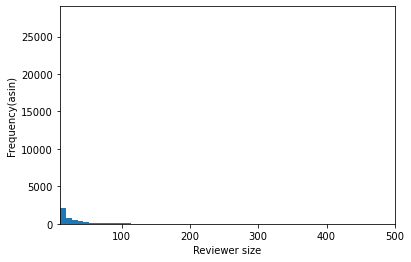

,asin_count
reviewer_size,
1,13519
2,5411
3,2955
4,1848
5,1248
...,...
266,1
269,1
270,1


In [125]:
plt.hist(df['reviewer_size'], bins=1000)
plt.xlim(10, 500)
plt.xlabel("Reviewer size")
plt.ylabel("Frequency(asin)")
plt.show()
plt_df = pd.DataFrame(df.value_counts('reviewer_size'), columns=['asin_count'])
plt_df

<BarContainer object of 265 artists>

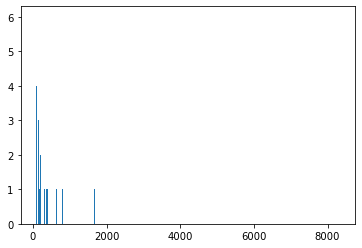

In [129]:
# plt_df = df.value_counts('size')
plt.bar(plt_df.index[100:-1], plt_df['asin_count'].tolist()[100:-1], width=1.0)
# plt_df
